In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [3]:
df = pd.read_csv('laptops.csv')
df.head()

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,Apple,Ultrabook,8,1.37,11.175755,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,10.776777,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,10.329931,0,0,141.211998,Intel Core i5,0,256,Intel,Others
3,Apple,Ultrabook,16,1.83,11.814476,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,11.473101,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [4]:
df.isnull().sum()

Company        0
TypeName       0
Ram            0
Weight         0
Price          0
TouchScreen    0
Ips            0
Ppi            0
Cpu_brand      0
HDD            0
SSD            0
Gpu_brand      0
Os             0
dtype: int64

In [5]:
numerical = df.select_dtypes(include=['float64', 'int64']).columns

categorical = df.select_dtypes(include=['object']).columns


In [6]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in categorical:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[numerical] = scaler.fit_transform(df[numerical])

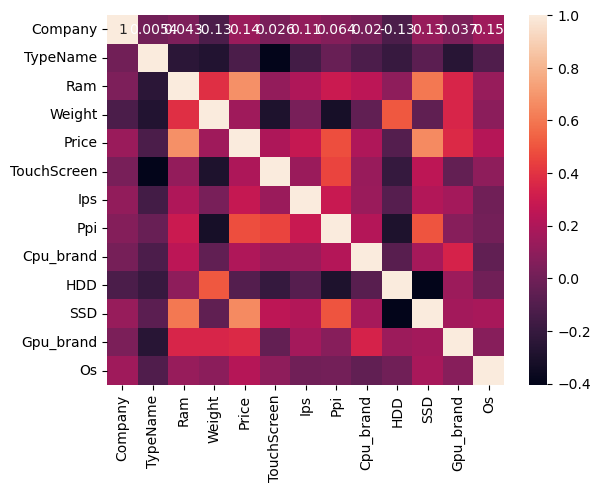

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.corr(), annot=True)
plt.show()


In [9]:
from sklearn.ensemble import RandomForestRegressor

In [10]:
X = df.drop('Price', axis=1)
y = df['Price']

In [11]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [12]:
model_rf = RandomForestRegressor()
model_rf.fit(X, y)

RandomForestRegressor()

In [18]:
y_pred_rf = model_rf.predict(X_test)
y_pred_rf

array([-0.53578708,  0.64302259,  0.59286932,  0.84242017,  0.22412454,
        1.41163169, -1.9325059 , -1.184788  ,  0.54919706,  1.64244264,
       -0.09565428,  0.06500814,  0.02933962, -0.52101651,  0.91774195,
        0.66537319,  0.82122917, -1.25578328,  1.64580551,  1.14446348,
       -1.94852183, -0.17830846, -0.58512284,  1.02613102, -1.69796486,
        1.50712599, -0.25432161,  0.06460818,  1.01598699, -0.0352574 ,
       -0.11327196, -0.07586494, -0.88254513, -0.84641019,  0.65409523,
        0.16166748, -0.62420487,  0.4479513 ,  1.2082113 , -1.17524556,
       -1.4706027 ,  1.52229777,  0.36181152, -0.03559489, -1.12607592,
        0.88906807,  0.82966349, -0.95735622,  0.37768922, -0.07471143,
        0.50702256,  1.27822556, -0.07950888, -1.0880641 ,  0.1842712 ,
        0.16035321,  0.95523811, -1.05408829, -0.21827496,  2.76152909,
        1.49837461,  0.33653345,  0.03407484, -1.81206323,  0.91792807,
       -0.52033006, -1.48647612, -0.66324949, -0.55569375,  0.10

In [19]:
model_rf.score(X_test,y_test)

0.9804742967475853

In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [21]:
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

In [22]:
print('Random Forest Regressor Performance')
print('Mean Squared Error : ',rf_mse)
print('Mean Absolute Error : ',rf_mae)
print('R-Squared : ',rf_r2)

Random Forest Regressor Performance
Mean Squared Error :  0.020165312548056123
Mean Absolute Error :  0.10534479242294256
R-Squared :  0.9804742967475853


In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

In [25]:
y_pred_lr = model_lr.predict(X_test)

In [26]:
model_lr.score(X_test,y_test)

0.6677584828673423

In [27]:
lr_mse = mean_squared_error(y_test, y_pred_lr)
lr_mae = mean_absolute_error(y_test, y_pred_lr)
lr_r2 = r2_score(y_test, y_pred_lr)

In [28]:
print('Linear Regression Performance')
print('Mean Squared Error : ',lr_mse)
print('Mean Absolute Error : ',lr_mae)
print('R-Squared : ',lr_r2)

Linear Regression Performance
Mean Squared Error :  0.34312485178180985
Mean Absolute Error :  0.47594154765422075
R-Squared :  0.6677584828673423


In [29]:
from sklearn.tree import DecisionTreeRegressor

In [30]:
model_dt = DecisionTreeRegressor(random_state=42)
model_dt.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

In [31]:
y_pred_dt = model_dt.predict(X_test)

In [32]:
model_dt.score(X_test,y_test)

0.8020157761717622

In [33]:
dt_mse = mean_squared_error(y_test, y_pred_dt)
dt_mae = mean_absolute_error(y_test, y_pred_dt)
dt_r2 = r2_score(y_test, y_pred_dt)

In [34]:
print('Decision Tree Performance')
print('Mean Squared Error : ',dt_mse)
print('Mean Absolute Error : ',dt_mae)
print('R-Squared : ',dt_r2)

Decision Tree Performance
Mean Squared Error :  0.20446965220507432
Mean Absolute Error :  0.33155896710080673
R-Squared :  0.8020157761717622


In [36]:
model_info={
    'Model':['Linear Regression','Decision tree','Random Forest Regressor'],
    'MAE':[lr_mae,dt_mae,rf_mae],
    'MSE':[lr_mse,dt_mse,rf_mse],
    'R2':[lr_r2,dt_r2,rf_r2],  
}
per = pd.DataFrame(model_info)
per

,Model,MAE,MSE,R2
0,Linear Regression,0.475942,0.343125,0.667758
1,Decision tree,0.331559,0.204470,0.802016
2,Random Forest Regressor,0.105345,0.020165,0.980474


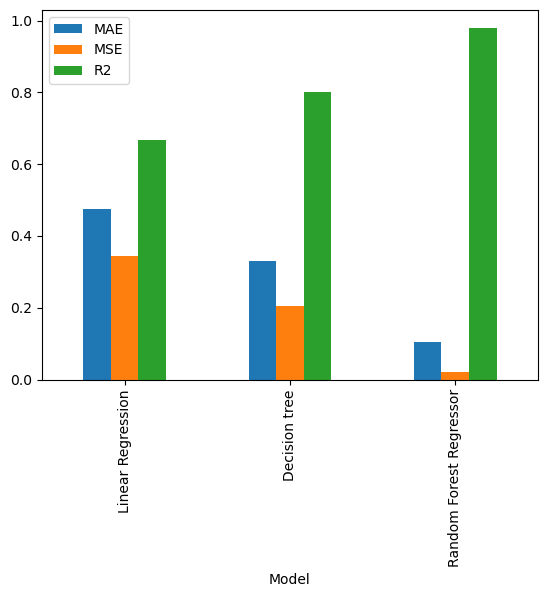

In [37]:
per.plot(kind='bar', x= 'Model')
plt.show()


In [38]:
print('Best Model Random Forest Classifier')

Best Model Random Forest Classifier


In [40]:
def laptop(comp, name, ram, wgt, touch, ips, ppi, cpu, hdd, ssd, gpu, os):
    ft = {
        'Company': comp,
        'TypeName': name,
        'Ram': ram,
        'Weight': wgt,
        'TouchScreen': touch,
        'Ips': ips,
        'Ppi': ppi,
        'Cpu_brand': cpu,
        'HDD': hdd,
        'SSD': ssd,
        'Gpu_brand': gpu,
        'Os': os
    }
    
    input = pd.DataFrame([ft])
    predicted = model_rf.predict(input)
    return predicted[0]

print(laptop(7, 2, 12, 3.5, 2, 0, 252, 2, 1, 712, 4, 2))


2.1735566334611507
